![Netflix Logo](https://sinangin.com/cks/dataScience/Netflix_EDA.webp)


<b>"With this notebook, exploratory data analysis (EDA) and data visualization have been conducted using the data from the `netflix_titles_2021.csv` file for the Netflix platform."</b>

<p style="background: linear-gradient(to right, #0a0a0a, #1c1c1c, #2e2e2e); color: #e0e0e0;
font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic; text-decoration: none;
padding: 15px 25px; border: 4px solid #1a1a1a; border-radius: 20px; display: flex; justify-content: center;
align-items: center; box-shadow: 0px 0px 20px 0px #000; text-shadow: 2px 2px 4px #000; text-align: center;">
    PREPARED BY : CENK SİNANGİN
</p>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import os

# word cloud library
from wordcloud import WordCloud

import cufflinks as cf # is a library that can work with the pandas library.
cf.go_offline() # we make graphics offline

import folium
from folium import plugins

# warnings
import warnings
warnings.filterwarnings("ignore") # we use it to not see trivial warnings in the code lines.

# Load the dataset
df = pd.read_csv("netflix_titles_2021.csv")

<p style="background: linear-gradient(to right, #0a0a0a, #1c1c1c, #2e2e2e); color: #e0e0e0;
font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic; text-decoration: none;
padding: 15px 25px; border: 4px solid #1a1a1a; border-radius: 20px; display: flex; justify-content: center;
align-items: center; box-shadow: 0px 0px 20px 0px #000; text-shadow: 2px 2px 4px #000; text-align: center;">
    STATISTIC IN DATAS
</p>



In [ ]:
df0=df.copy() #df0 We will create a copy of the original dataset and continue the operations on the copied dataset. This way, any changes made will not affect the original data.
df0

In [4]:
df.head() # View the first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.tail() # View the first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
df.sample(5) # datayı gözden geçirmek için karışık 5(istediğin kadar sayı yazabilirsin) satırı incele, bu satırı birkaç defa çalıştır.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7160,s7161,Movie,Kaalia,Tinnu Anand,"Amitabh Bachchan, Asha Parekh, Parveen Babi, A...",India,"December 31, 2019",1981,TV-14,173 min,"Action & Adventure, Dramas, International Movies",Jailed for robbing his brother’s unscrupulous ...
3367,s3368,TV Show,"Wait, My Youth",NaN,"Zhao Yiqin, Li Jiaqi, Li Geyang, Xu Mengyuan, ...",China,"October 27, 2019",2019,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, Tee...",Six hopeful friends journey into adulthood to ...
8272,s8273,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong","January 1, 2021",2006,R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...
1005,s1006,Movie,Keymon and Nani in Space Adventure,NaN,NaN,NaN,"April 20, 2021",2013,TV-Y,76 min,"Children & Family Movies, Comedies","For Rohan and his magical pal, Keymon, a trip ..."
5982,s5983,Movie,100 Days Of Solitude,NaN,NaN,Spain,"July 6, 2018",2018,TV-MA,93 min,"Documentaries, International Movies",Spanish photographer José Díaz spends 100 days...


In [7]:
df.info() # # Overview of the dataset
# For example, there are no missing values in the 'type' column, but only 7982 rows in the 'cast' column have values, meaning 825 rows are empty.
# Only the 'release_year' column is of type int. The contents of the other columns should be checked, and the type of numeric columns should be identified and changed accordingly.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.shape  # View the number of rows and columns. The output should be in the form: (number of rows, number of columns)

(8807, 12)

In [9]:
df.columns # Checking column names. There might be no need to change column names if there are no problematic issues with letter case or punctuation marks.

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.isnull() # We are checking if there are any NaN values throughout the data, but this method returns all rows and columns


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum() # Observing the total number of non-null values per column


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df.nunique() # Viewing the unique values per column, so values that do not repeat

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [13]:
df.rating.unique() # When evaluating columns, it might be appropriate to look at values this way.

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
df.duplicated() # Check if there are repeating values on a row-by-row basis. We see that there are no repeating columns by name. However, it is also necessary to check the column values to ensure that there are no columns with the same functionality

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [15]:
df.duplicated().sum() # Looks at the total number of repeating values, and there are no repeating values in this data.

0

In [16]:
df.describe() # Displays only the values of integer columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [17]:
df.describe(include='object') # Displays the statistical values of string data.


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [18]:
# Displaying the total and percentage of missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))

              Missing Values  Percentage
director                2634   29.908028
country                  831    9.435676
cast                     825    9.367549
date_added                10    0.113546
rating                     4    0.045418
duration                   3    0.034064
show_id                    0    0.000000
type                       0    0.000000
title                      0    0.000000
release_year               0    0.000000
listed_in                  0    0.000000
description                0    0.000000


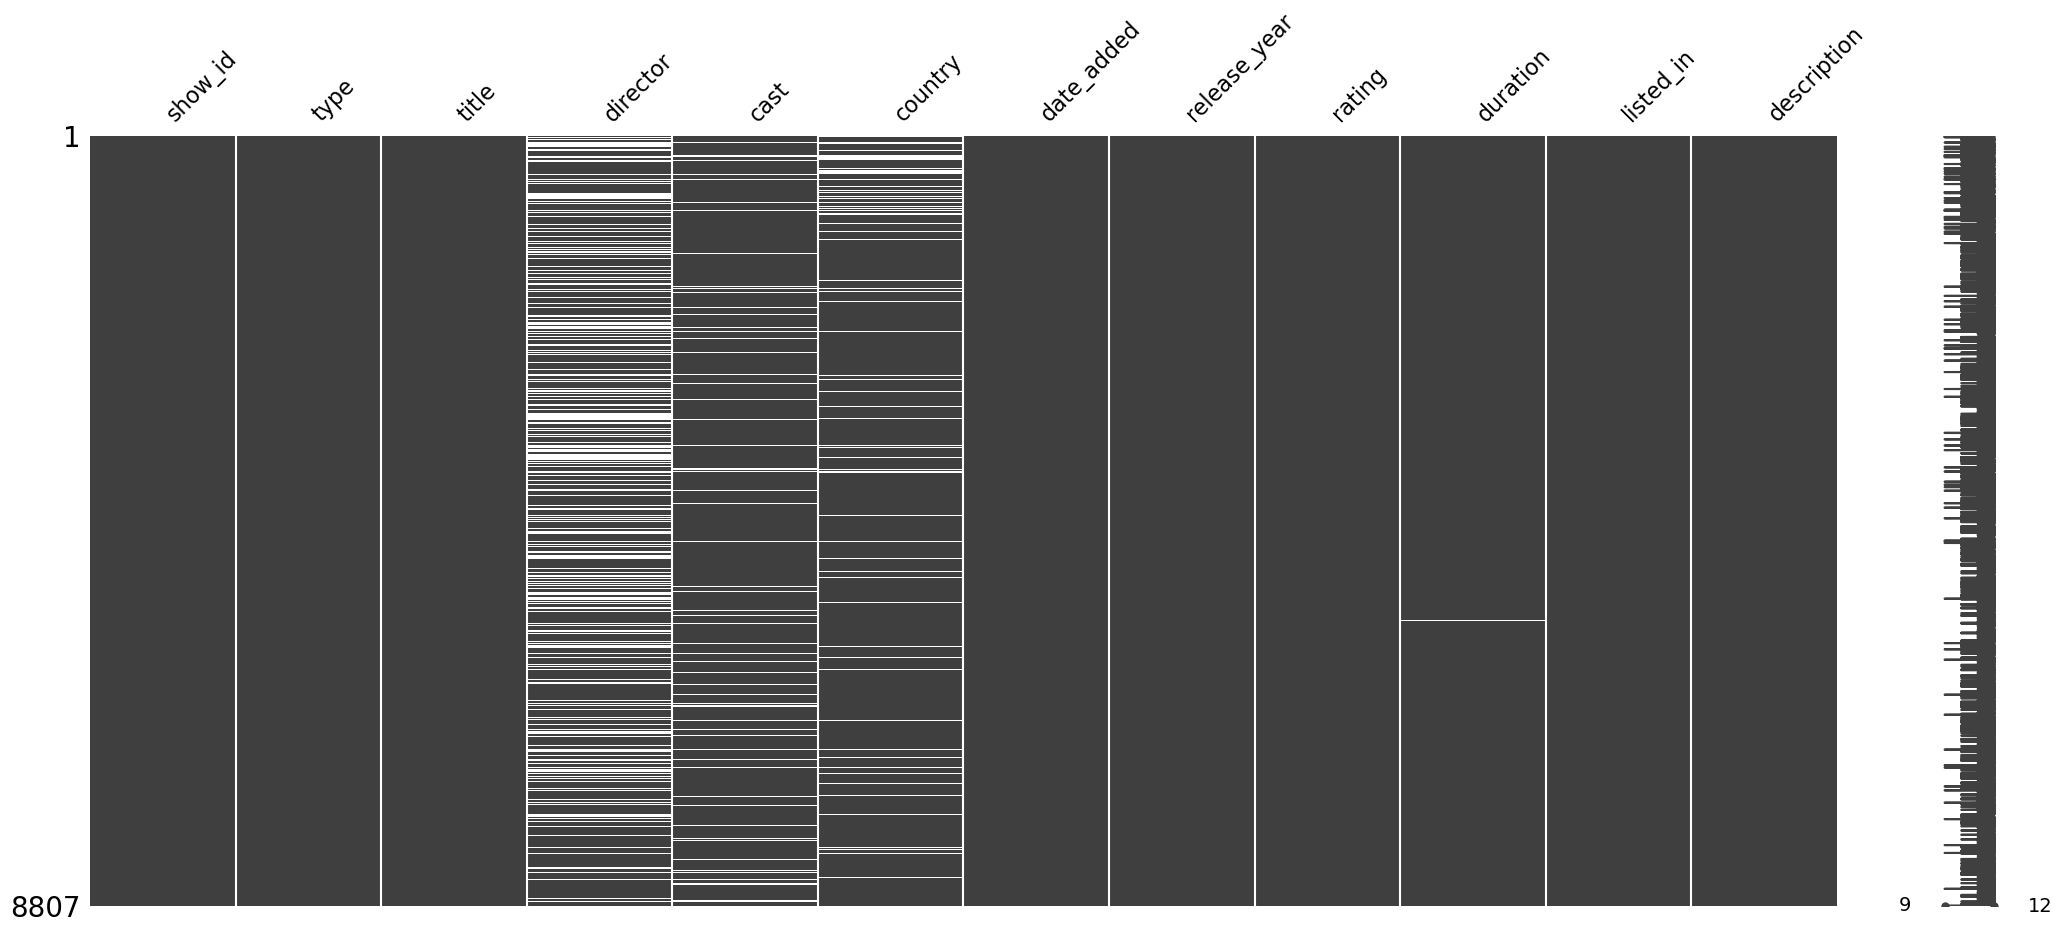

In [19]:
msno.matrix(df); # This command is used to visualize missing values within the DataFrame; the density of white lines indicates the frequency of missing values.

In [20]:
modes = df.mode().iloc[0]
modes
# Finding the most frequently occurring value (mode) in each column

show_id                                                        s1
type                                                        Movie
title                                                      #Alive
director                                            Rajiv Chilaka
cast                                           David Attenborough
country                                             United States
date_added                                        January 1, 2020
release_year                                               2018.0
rating                                                      TV-MA
duration                                                 1 Season
listed_in                            Dramas, International Movies
description     Paranormal activity at a lush, abandoned prope...
Name: 0, dtype: object

In [21]:
modes = df.mode().iloc[0]
mode_counts = df.apply(lambda x: x.value_counts().max())
mode_counts
# We see how many times the repeating values from above occur. 
# For example, in the 'type' column, the movie name appears 6,131 times.

show_id            1
type            6131
title              1
director          19
cast              19
country         2818
date_added       109
release_year    1147
rating          3207
duration        1793
listed_in        362
description        4
dtype: int64

In [ ]:
# Detecting outliers by calculating the Interquartile Range (IQR)
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers
outliers = df[(df['release_year'] < (Q1 - 1.5 * IQR)) | (df['release_year'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in 'release_year': \n{outliers}")

In [23]:
# Examine the distribution of outlier years.
outlier_years = outliers['release_year'].value_counts()
print(outlier_years)

release_year
2003    61
2002    51
2001    45
1999    39
1997    38
2000    37
1998    36
1993    28
1995    25
1996    24
1992    23
1994    22
1990    22
1988    18
1982    17
1991    17
1989    16
1981    13
1986    13
1984    12
1979    11
1980    11
1983    11
1973    10
1985    10
1976     9
1987     8
1978     7
1975     7
1974     7
1977     7
1971     5
1972     5
1967     5
1945     4
1960     4
1962     3
1968     3
1955     3
1944     3
1943     3
1958     3
1963     2
1956     2
1969     2
1954     2
1964     2
1965     2
1946     2
1942     2
1970     2
1925     1
1966     1
1959     1
1961     1
1947     1
Name: count, dtype: int64


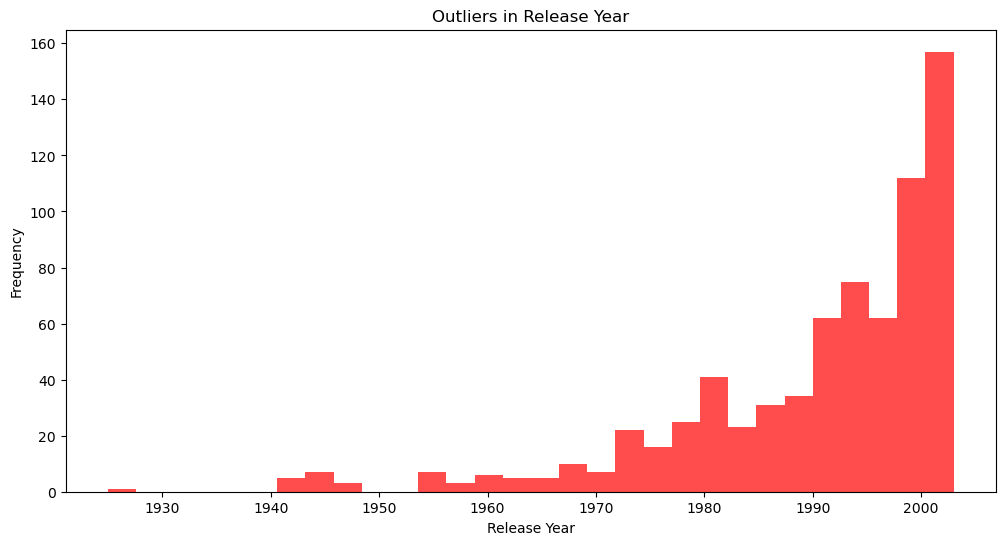

In [24]:
import matplotlib.pyplot as plt

# Distribution plot of outlier years.
plt.figure(figsize=(12, 6))
plt.hist(outliers['release_year'], bins=30, color='red', alpha=0.7)
plt.title('Outliers in Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# The following graph shows that the outlier value is in the earliest year (1930), indicating that the film industry has shown growth in more recent years. 
# The graph also shows that the outliers are at the very beginning and the far left. When the graph shows that the average values are in the 60-70 range and the median is in the 40-50 
# range, it is easy to identify that the outliers are at the start and far left of the graph

<p style="background: linear-gradient(to right, #0a0a0a, #1c1c1c, #2e2e2e); color: #e0e0e0;
font-family: Trebuchet MS; font-size: 35px; font-weight: 900; font-style: italic; text-decoration: none;
padding: 15px 25px; border: 4px solid #1a1a1a; border-radius: 20px; display: flex; justify-content: center;
align-items: center; box-shadow: 0px 0px 20px 0px #000; text-shadow: 2px 2px 4px #000; text-align: center;">
    FILL IN MISSING DATA
</p>

After identifying which columns in the dataset have missing values, we can use one or more of the following strategies:

1. For Categorical Data: Fill in with the most common value (mode) or a specific constant value.
2. For Numerical Data: Fill in with the mean, median, or through interpolation.
3. For Textual Data: Fill in with a specific constant value such as 'Unknown' or 'Not Available'

In [25]:
# Let's fill the missing (NaN) values in the 'director' column with 'Unknown'.

df['director'] = df['director'].fillna('Unknown')
df.director.value_counts()

director
Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [ ]:
# Let's fill the missing (NaN) values in the 'cast' column with 'Unknown'.

df['cast'] = df['cast'].fillna('Unknown')
df.cast.value_counts()

In [27]:
# Let's fill the missing (NaN) values in the 'country' column with 'Unknown'.

df['country'] = df['country'].fillna('Unknown')
df.country.value_counts()

country
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [28]:
# Let's fill the missing (NaN) values in the 'date_added' column with 'Unknown'.

df['date_added'] = df['date_added'].fillna('Unknown')
df.date_added.value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1768, dtype: int64

In [29]:
# Let's fill the missing (NaN) values in the 'rating' column with 'Unknown'.

df['rating'] = df['rating'].fillna('Unknown')
df.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [30]:
# Let's fill the missing (NaN) values in the 'duration' column with 'Unknown'.

df['duration'] = df['duration'].fillna('Unknown')
df.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

In [31]:
# "Date Example: 'January 8, 2018' 
#Therefore, we remove any leading or trailing spaces and capitalize the first letter of the month.

df['date_added'] = df['date_added'].str.strip().str.title()

In [32]:
# Splitting the date column into day, month, and year
# Date Example: 'January 8, 2018' 
# Matching format = `format="%B %d, %Y`

df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce') 

df['year'] = df['date_added'].dt.year.fillna(0).astype(int)
df['month'] = df['date_added'].dt.month.fillna(0).astype(int)
df['day'] = df['date_added'].dt.day.fillna(0).astype(int)

In [33]:
df['season'] = df['month'].apply(lambda x: 
                                 "winter" if x in [12, 1, 2] else 
                                 "spring" if x in [3, 4, 5] else 
                                 "summer" if x in [6, 7, 8] else 
                                 "autumn")

In [34]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season
1015,s1016,Movie,American Me,Edward James Olmos,"Edward James Olmos, William Forsythe, Pepe Ser...",United States,2021-04-17,1992,R,126 min,Dramas,Three friends born in poverty create their own...,2021,4,17,spring
2619,s2620,Movie,Lembi 8 Giga,Ashraf Fayeq,"Mohamed Saad, Mai Ezz El-Din, Hassan Hosny, Yo...",Unknown,2020-04-28,2010,TV-MA,111 min,"Comedies, International Movies","To upgrade his life, a simple man fakes his cr...",2020,4,28,spring
8553,s8554,Movie,The Water Horse: Legend of the Deep,Jay Russell,"Emily Watson, Alex Etel, Ben Chaplin, David Mo...","New Zealand, United Kingdom, Australia",2018-11-01,2007,PG,112 min,Children & Family Movies,A boy watches an egg he found hatch into somet...,2018,11,1,autumn
1052,s1053,Movie,The Master,Paul Thomas Anderson,"Joaquin Phoenix, Philip Seymour Hoffman, Amy A...",United States,2021-04-15,2012,R,137 min,"Dramas, Independent Movies",A heavy-drinking loner finds some semblance of...,2021,4,15,spring
479,s480,Movie,Fear Street Part 2: 1978,Leigh Janiak,"Sadie Sink, Emily Rudd, Ryan Simpkins, McCabe ...",Unknown,2021-07-09,2021,R,111 min,Horror Movies,"In the cursed town of Shadyside, a killer's mu...",2021,7,9,summer
7220,s7221,Movie,Knowing,Alex Proyas,"Nicolas Cage, Chandler Canterbury, Rose Byrne,...","United States, United Kingdom, Australia",2019-10-01,2009,PG-13,121 min,"Sci-Fi & Fantasy, Thrillers",An MIT astrophysics professor and his son unea...,2019,10,1,autumn
524,s525,TV Show,Midnight Diner: Tokyo Stories,Unknown,"Kaoru Kobayashi, Joe Odagiri, Mansaku Fuwa, Re...",Japan,2021-07-06,2019,TV-MA,2 Seasons,"International TV Shows, TV Dramas",Patrons of an otherwise mundane Japanese diner...,2021,7,6,summer
1963,s1964,Movie,DTC Yukemuri Junjo Hen From High & Low,Norihisa Hiranuma,"Kenjiro Yamashita, Kanta Sato, Taiki Sato, Mas...",Japan,2020-09-20,2018,TV-PG,102 min,"Dramas, International Movies","Dan, Tettsu and Chiharu leave the battles of t...",2020,9,20,autumn
8294,s8295,Movie,The Fear of 13,David Sington,Unknown,United Kingdom,2016-06-01,2015,TV-MA,95 min,"Documentaries, International Movies","After 20 years on Death Row, self-educated inm...",2016,6,1,summer
587,s588,TV Show,Quarantine Tales,"Sidharta Tata, Aco Tenriyagelli, Dian Sastrowa...","Adinia Wirasti, Marissa Anita, Faradina Mufti,...",Unknown,2021-07-01,2020,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas","Traversing genres, five separate stories offer...",2021,7,1,summer


In [35]:
# The data in the 'duration' column includes both 'X min' (in minutes) and 'X Seasons' (number of seasons).
# In this case, we are dealing with two different types of data:

# Duration in Minutes: Used for movies.
# Number of Seasons: Used for TV shows.

In [36]:
# 1. Separating Data Types
# First, we can split the data into separate columns for movies and TV shows.

# Create a new column for values that contain 'min'.
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in str(x) else np.nan)

# Create a new column for values that contain 'Seasons'.
df['duration_seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in str(x) else np.nan)

In [37]:
# 2. Filling Missing Values 
# We can either estimate the missing durations or number of seasons, or use a specific constant value for missing data.

# Fill missing durations in minutes with the average (if the value is missing numerically).
flt1 = [i == "Movie" for i in df.loc[:, "type"]]
df.loc[flt1, 'duration_minutes'] = df.loc[flt1, 'duration_minutes'].fillna(df.loc[flt1, 'duration_minutes'].mean())

# Fill missing season counts with the mode (most common value) (if the value is missing numerically).
flt2 = [i == "TV Show" for i in df.loc[:, "type"]]
df.loc[flt2, 'duration_seasons'] = df.loc[flt2, 'duration_seasons'].fillna(df.loc[flt2, 'duration_seasons'].mode()[0])

In [38]:
df.loc[:, 'duration_minutes'].value_counts()

duration_minutes
90.0     152
94.0     146
93.0     146
97.0     146
91.0     144
        ... 
16.0       1
8.0        1
9.0        1
208.0      1
191.0      1
Name: count, Length: 206, dtype: int64

In [39]:
df.loc[:, 'duration_seasons'].value_counts()

duration_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
13.0       3
15.0       2
12.0       2
11.0       2
17.0       1
Name: count, dtype: int64

In [40]:
# 3. Cleaning the Original 'duration' Column
# We can replace the original 'duration' column with the newly created 'duration_minutes' and 'duration_seasons' columns.

# Update the 'duration' column based on the newly created columns.
# Separate movies and TV shows and reorganize the 'duration' column accordingly.


df['duration'] = df.apply(lambda row: f"{int(row['duration_minutes'])} min" if row['type'] == 'Movie' 
                        else f"{int(row['duration_seasons'])} Seasons", axis=1)

In [41]:
df[['title', 'duration', 'duration_minutes', 'duration_seasons']].head(5)

,title,duration,duration_minutes,duration_seasons
0,Dick Johnson Is Dead,90 min,90.0,NaN
1,Blood & Water,2 Seasons,NaN,2.0
2,Ganglands,1 Seasons,NaN,1.0
3,Jailbirds New Orleans,1 Seasons,NaN,1.0
4,Kota Factory,2 Seasons,NaN,2.0


## Data cleaning

In [42]:
#1. Removing Duplicate Rows: 
# If the same movie has been added multiple times, we can remove these duplicates

df = df.drop_duplicates()

In [43]:
# "2. Removing Unnecessary Whitespaces:
# Some text entries may have unnecessary spaces at the beginning or end. Let's clean these up."

df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()

## Final check for missing data

In [44]:
# Final check: 
# After all these operations, let's perform another check for missing data.

last_df_missing = df.isnull().sum()
last_df_missing

show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added            10
release_year           0
rating                 0
duration               0
listed_in              0
description            0
year                   0
month                  0
day                    0
season                 0
duration_minutes    2676
duration_seasons    6131
dtype: int64

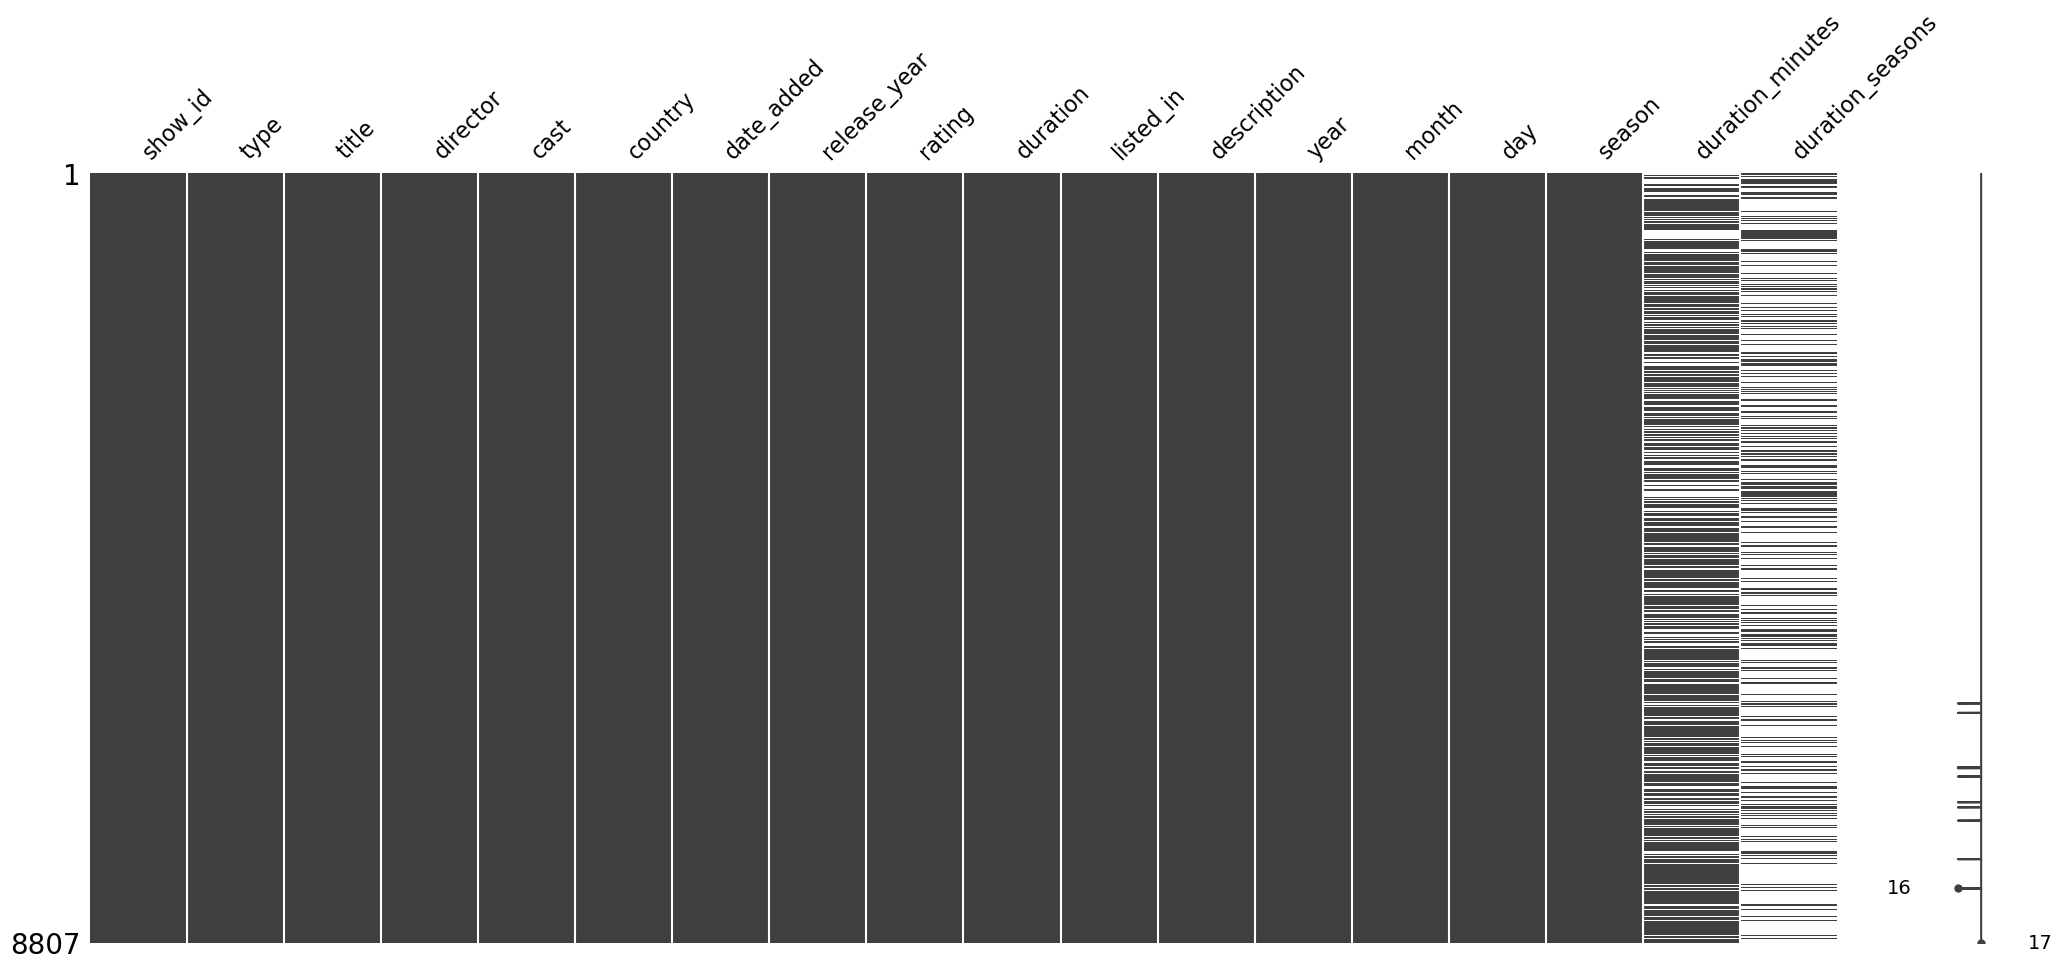

In [45]:
import missingno as msno
msno.matrix(df);

In [ ]:
flt_mov = [True if i > 0 else False for i in df.loc[:, "duration_minutes"]]
df.loc[flt_mov, :]

In [ ]:
flt_ser = [True if i > 0 else False for i in df.loc[:, "duration_seasons"]]
df.loc[flt_ser, :]

<p style="background: linear-gradient(to right,#6319ca ,#e0b633); background-color: #6319ca; color: #fff;
font-family: Trebuchet MS; font-size: 50px; font-weight: 800; font-style: italic; text-decoration: none; 
padding: 15px 15px; border: 5px solid #180591; border-radius: 20px; justify-content: center; 
align-items: center; box-shadow: 0px 0px 10px 0px #2D2D2D; text-shadow: 2px 2px 0px #000; text-align:center;">
DATA VISUALIZATION
</p>

In [48]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season,duration_minutes,duration_seasons
5032,s5033,TV Show,The Frankenstein Chronicles,Unknown,"Sean Bean, Tom Ward, Richie Campbell, Vanessa ...",United Kingdom,2018-02-20,2017,TV-MA,2 Seasons,"British TV Shows, Crime TV Shows, Internationa...",A detective tracks what seems to be a killer w...,2018,2,20,winter,NaN,2.0
1249,s1250,Movie,Blanche Gardin: The All-Nighter,"Xavier Maingon, Marc-Antoine Hélard",Blanche Gardin,Unknown,2021-03-01,2021,TV-MA,96 min,Stand-Up Comedy,"With self-deprecating humor, French comic Blan...",2021,3,1,spring,96.0,NaN
1940,s1941,Movie,Golmaal Returns,Rohit Shetty,"Ajay Devgn, Kareena Kapoor, Arshad Warsi, Tuss...",India,2020-09-28,2008,TV-MA,135 min,"Comedies, International Movies, Music & Musicals",A man's relationship with his jealous wife ent...,2020,9,28,autumn,135.0,NaN
1067,s1068,TV Show,The Underclass,Pass Patthanakumjon,"Nannaphas Loetnamchoetsakun, Praewa Suthamphon...",Thailand,2021-04-14,2020,TV-MA,1 Seasons,"International TV Shows, TV Dramas, Teen TV Shows","After getting dropped from an elite program, a...",2021,4,14,spring,NaN,1.0
75,s76,Movie,You vs. Wild: Out Cold,Ben Simms,"Bear Grylls, Jason Derek Prempeh",Unknown,2021-09-14,2021,TV-G,106 min,Children & Family Movies,"After a plane crash leaves Bear with amnesia, ...",2021,9,14,autumn,106.0,NaN


<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"type" column</b></p>

## To show the distribution of movies and TV shows in the dataset, use a pie chart and a bar chart.

In [49]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

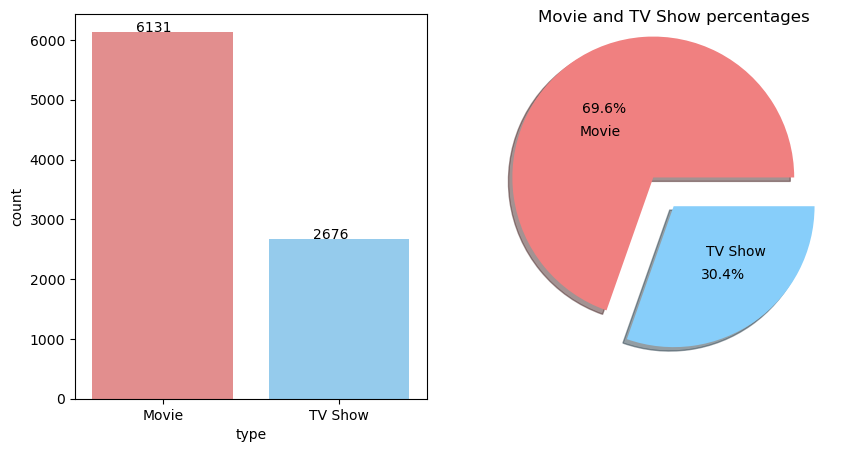

In [50]:
color_list = ["lightcoral", "lightskyblue"]
explode_list = [0.25, 0]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(data = df, x = "type", ax = ax[0], palette = color_list)
plt.pie(df.type.value_counts(), labels = df.type.unique(), pctdistance = 0.6, labeldistance = 0.4,
         autopct = '%1.1f%%', shadow = True, colors = color_list, explode = explode_list)

plt.title('Movie and TV Show percentages')

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}", (p.get_x() + 0.25, p.get_height() + 1))
    
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"title" column</b></p>

# Displaying the top 20 most frequently occurring words in movie or TV show titles using a bar chart (excluding prefixes and articles)

In [51]:
# Text preprocessing for analyzing the most frequently used words (in the 'title' column).
from collections import Counter
import string

In [52]:
# Using the replace operation to remove words.
excluded_words = {' the ': "", ' of ': "", ' a ': "", ' in ': "", ' and ': "", ' to ': "", ' 2 ': "", ' for ': "", ' on ': "", 'The': "", '&': "", 'A ': "", '2': ""}
filtered_df = df['title']

# Remove words from the 'title' column.
for word, replacement in excluded_words.items():
    filtered_df = filtered_df.str.replace(word, replacement, case=False)

In [53]:
# Calculate word frequencies
all_words = ' '.join(filtered_df).split()
word_freq = Counter(all_words)

# The top 20 most frequently occurring words.
most_common_words = word_freq.most_common(20)
most_common_words

[('My', 129),
 ('Love', 114),
 ('I', 93),
 ('with', 67),
 ('Christmas', 66),
 ('You', 64),
 ('Man', 62),
 ('Little', 58),
 ('One', 50),
 ('Story', 50),
 ('American', 50),
 ('Last', 47),
 ('Life', 44),
 ('Me', 44),
 ('Black', 43),
 ('Super', 42),
 ('Day', 40),
 ('Is', 39),
 ('We', 38),
 ('Power', 38)]

In [54]:
# Show the top 20 most frequently occurring words.
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
most_common_words_df

,Word,Frequency
0,My,129
1,Love,114
2,I,93
3,with,67
4,Christmas,66
5,You,64
6,Man,62
7,Little,58
8,One,50
9,Story,50


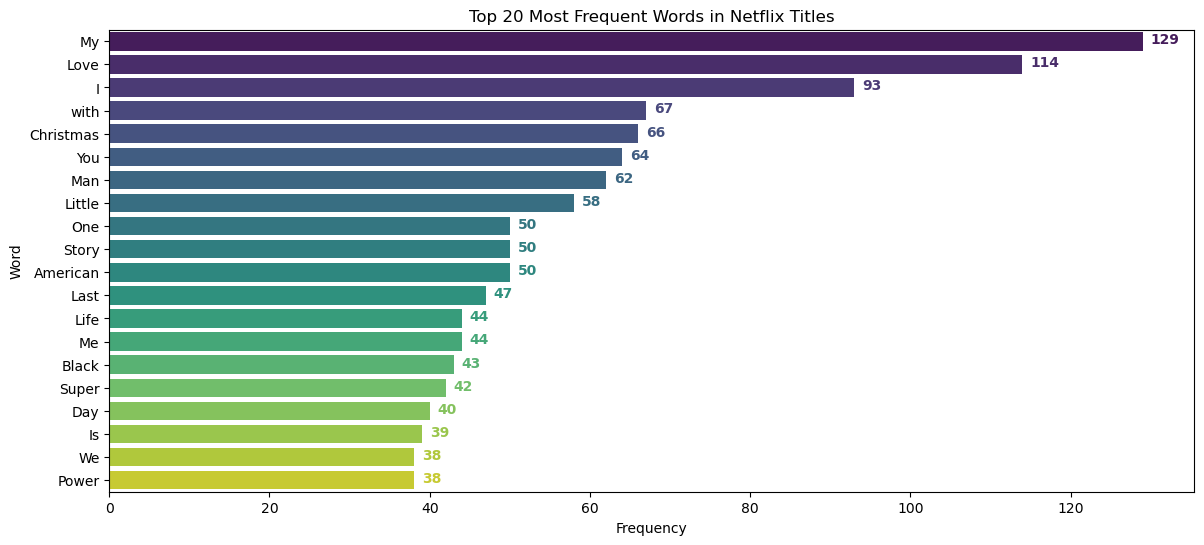

In [55]:
# Visually display the top 20 most frequently occurring words.
fig, ax = plt.subplots(figsize = (14, 6))
sns.barplot(x='Frequency', y='Word', data=most_common_words_df, palette='viridis')

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
    
plt.title('Top 20 Most Frequent Words in Netflix Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"date_added" column</b></p>

## Create a line chart and a bar chart showing the number of movies and TV shows by their addition date to the platform. Additionally, create a pie chart for the season column generated through manipulation.

In [56]:
df_grouped = df[df.year > 0].groupby(['year', 'type']).size().reset_index(name='count').sort_values("year")
df_grouped

,year,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


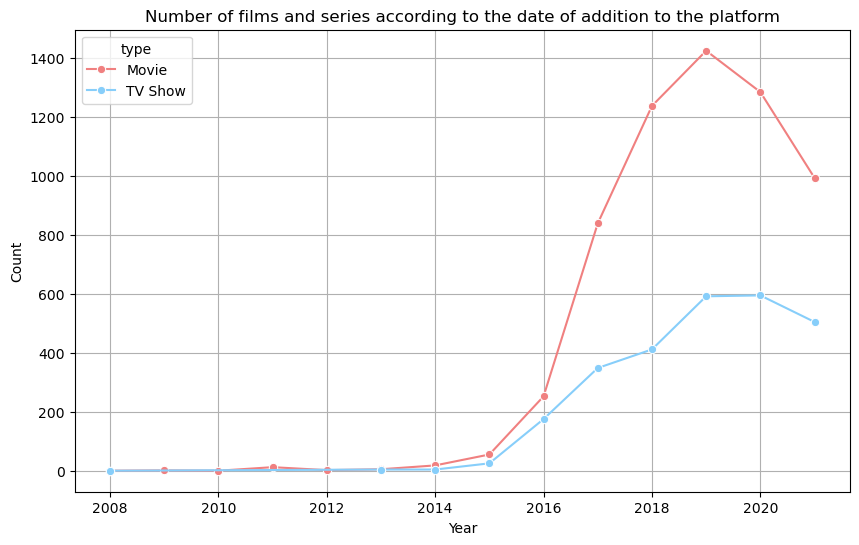

In [57]:
color_list = ["lightcoral", "lightskyblue"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='year', y='count', hue='type', marker='o', palette=color_list)

plt.title('Number of films and series according to the date of addition to the platform')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

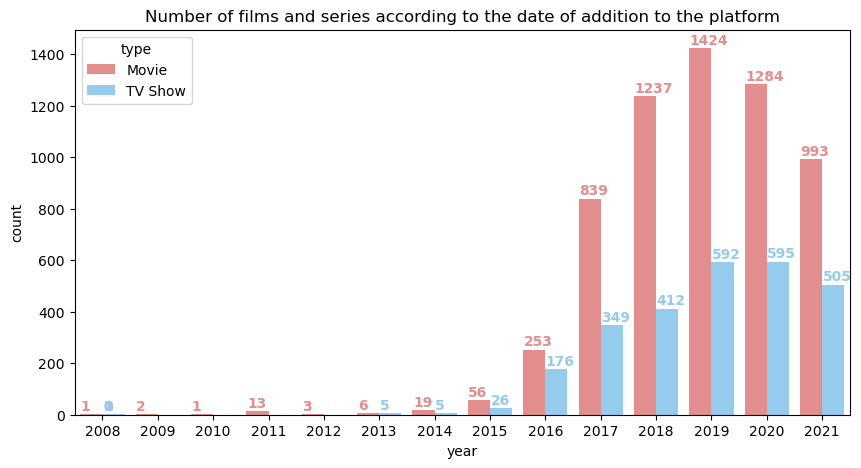

In [58]:
color_list = ["lightcoral", "lightskyblue"]

fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.countplot(x = "year", hue = "type", data = df[df.year > 0], palette=color_list)

plt.title('Number of films and series according to the date of addition to the platform')

for p in ax.patches:
    bar_color = p.get_facecolor()

    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.01, p.get_height() + 15), fontsize=10, color=bar_color, fontweight='bold')

plt.show()

In [59]:
df.season.value_counts()

season
summer    2310
autumn    2245
spring    2138
winter    2114
Name: count, dtype: int64

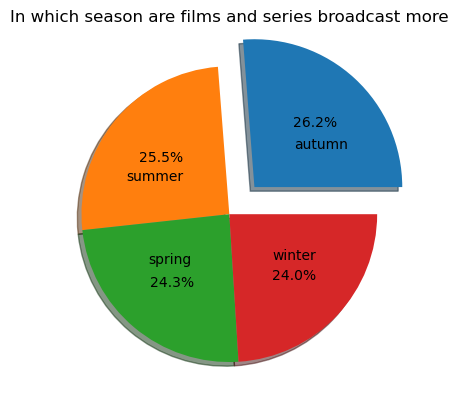

In [60]:
explode_list = [0.25, 0, 0, 0]

plt.pie(df.season.value_counts(), labels = df.season.unique(), pctdistance = 0.6, labeldistance = 0.4,
         autopct = '%1.1f%%', shadow = True, colors = plt.get_cmap('tab10').colors[:4], explode = explode_list)

plt.title('In which season are films and series broadcast more')
    
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"release_year" column</b></p>

## Create a line chart and a bar chart showing the number of movies and TV shows by release date, starting from the year 2010.

In [61]:
df_release = df.groupby(['release_year', 'type']).size().reset_index(name='count').sort_values("release_year", ascending=False)
df_release = df_release.head(24)
df_release

,release_year,type,count
118,2021,TV Show,315
117,2021,Movie,277
116,2020,TV Show,436
115,2020,Movie,517
114,2019,TV Show,397
113,2019,Movie,633
112,2018,TV Show,380
111,2018,Movie,767
110,2017,TV Show,265
109,2017,Movie,767


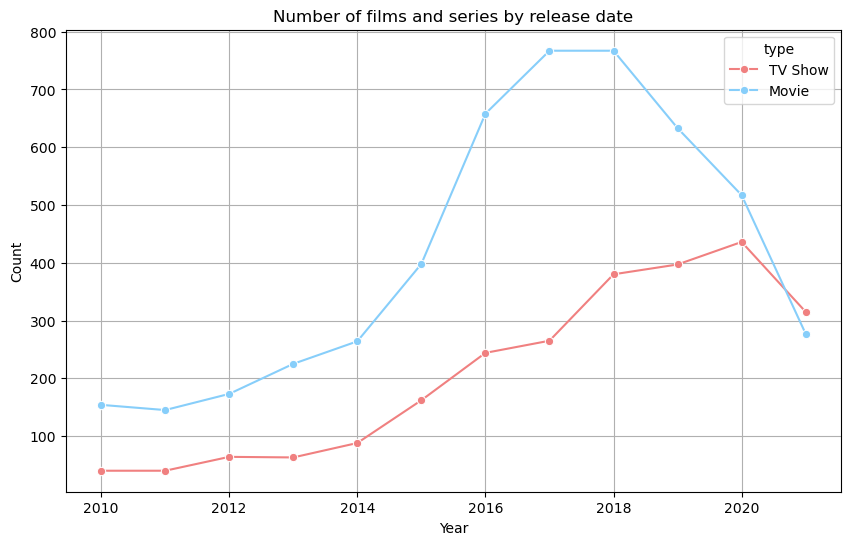

In [62]:
color_list = ["lightcoral", "lightskyblue"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_release, x='release_year', y='count', hue='type', marker='o', palette=color_list)

plt.title('Number of films and series by release date')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

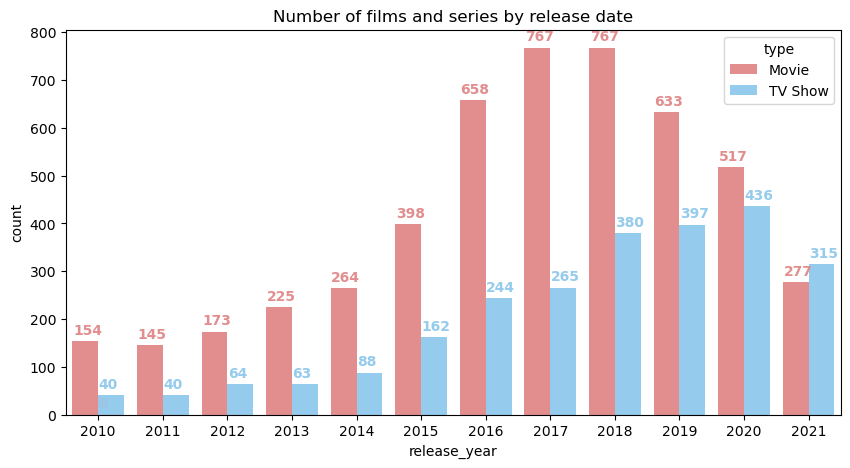

In [63]:
color_list = ["lightcoral", "lightskyblue"]

fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.countplot(x = "release_year", hue = "type", data = df[df.release_year >= 2010], palette=color_list)

plt.title('Number of films and series by release date')

for p in ax.patches:
    bar_color = p.get_facecolor()

    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.01, p.get_height() + 15), fontsize=10, color=bar_color, fontweight='bold')

plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"rating" column</b></p>

# Create a bar chart showing which ratings have more content

In [64]:
df['rating'].value_counts().head(11)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
Name: count, dtype: int64

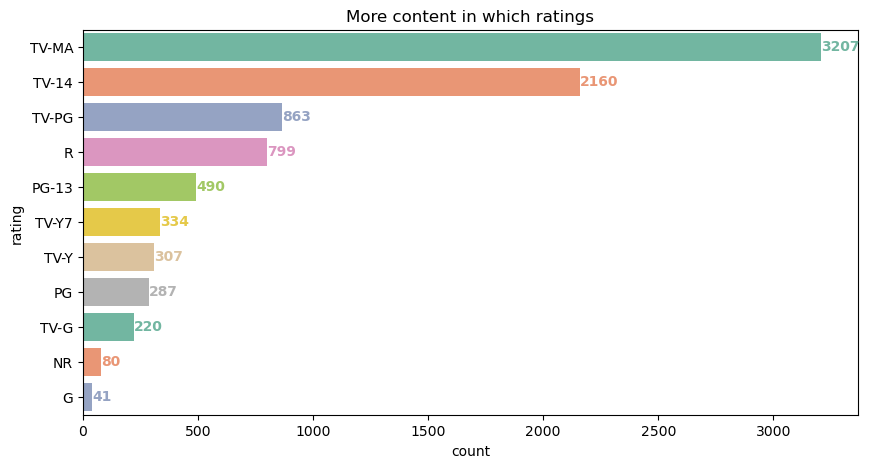

In [65]:
order = df['rating'].value_counts().head(11).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, y = "rating", palette = "Set2", order = order)

plt.title('More content in which ratings')

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
    
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"country" column</b></p>

# To display the number of contents produced in different countries, a world map can be used.

In [67]:
mapList = pd.read_csv("country_locations.csv")
mapList.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [68]:
type_counts = df[df.country != "Unknown"].groupby(['country', 'type']).size().unstack(fill_value=0).reset_index().sort_values("Movie", ascending=False).head(10)
type_counts

type,country,Movie,TV Show
603,United States,2058,760
251,India,893,79
506,United Kingdom,206,213
58,Canada,122,59
444,Spain,97,48
150,Egypt,92,14
368,Nigeria,86,9
272,Indonesia,77,2
319,Japan,76,169
492,Turkey,76,29


In [69]:
country_coords = mapList[mapList['Country'].isin(type_counts.loc[:,"country"])]
country_coords = country_coords[['Country', 'Latitude (average)', 'Longitude (average)']]
country_coords

,Country,Latitude (average),Longitude (average)
37,Canada,60.0,-95.0
62,Egypt,27.0,30.0
99,India,20.0,77.0
100,Indonesia,-5.0,120.0
108,Japan,36.0,138.0
159,Nigeria,10.0,8.0
203,Spain,40.0,-4.0
222,Turkey,39.0,35.0
229,United Kingdom,54.0,-2.0
230,United States,38.0,-97.0


In [70]:
# create a map
m = folium.Map(location=[20,0], zoom_start=2)

# Add the type counts to the coordinates by country.
for _, row in country_coords.iterrows():
    country = row['Country']
    latitude = row['Latitude (average)']
    longitude = row['Longitude (average)']
    
    # Obtain type counts by country
    type_counts_row = type_counts[type_counts['country'] == country]
    movie_count = type_counts_row['Movie'].values[0] if 'Movie' in type_counts_row.columns else 0
    tv_shows_count = type_counts_row['TV Show'].values[0] if 'TV Show' in type_counts_row.columns else 0
    
    # Popup message
    popup_message = f"Country: {str(type_counts_row["country"].values).upper()[2:-2]}, Movies: {movie_count}, TV Shows: {tv_shows_count}"
    
    # Add marker
    folium.Marker(
        location=[latitude, longitude],
        popup=popup_message,
        icon=folium.Icon(color='blue' if movie_count > tv_shows_count else 'red')
    ).add_to(m)

# Display map
m.save('map.html')
m

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"director" column</b></p>

# Bar chart showing the directors who produce the most content.

In [71]:
df[df.director != "Unknown"].director.value_counts().head(13)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Name: count, dtype: int64

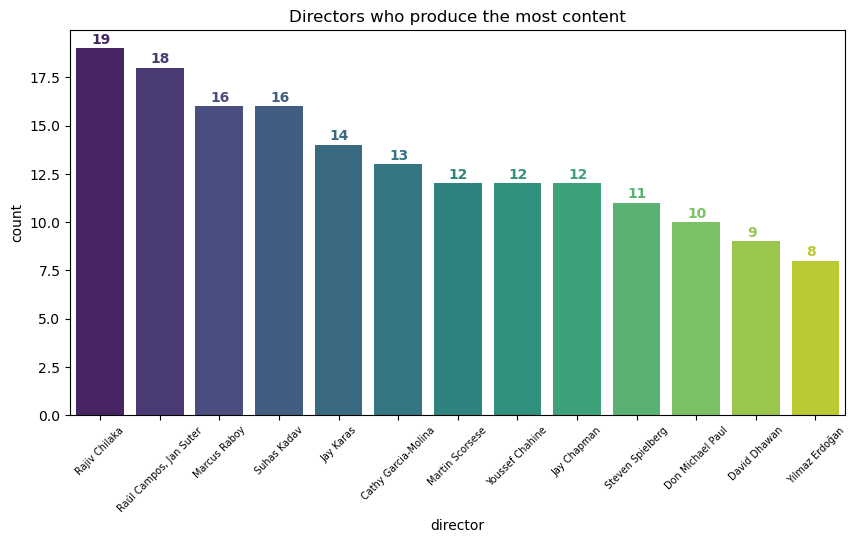

In [72]:
order = df[df.director != "Unknown"].director.value_counts().head(13).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, x = "director", palette = "viridis", order = order)

plt.title('Directors who produce the most content')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.25, p.get_height() + 0.25), fontsize=10, color=p.get_facecolor(), fontweight='bold')

plt.xticks(rotation=45, fontsize=7)

plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"duration" column</b></p>

# Showing the distribution of content duration for movies in minutes and for TV series by season using a histogram.

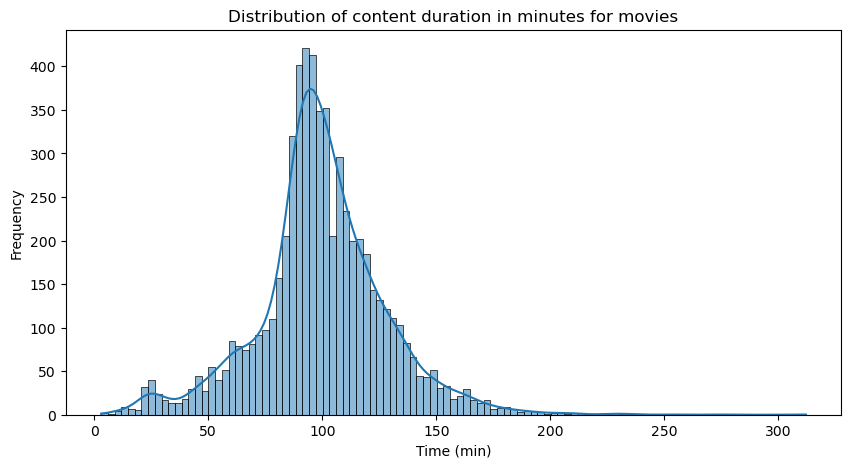

In [73]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.histplot(x = "duration_minutes", data = df, kde = True)

plt.title("Distribution of content duration in minutes for movies")
plt.xlabel("Time (min)")
plt.ylabel("Frequency")

plt.show()

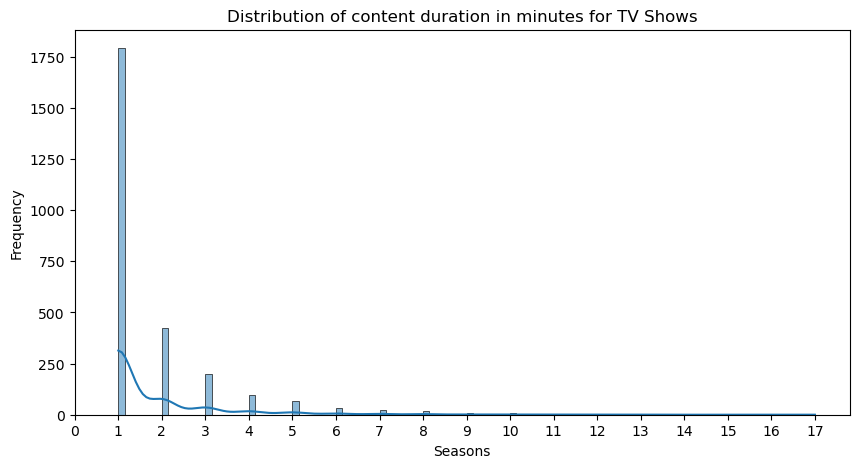

In [74]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.histplot(x = "duration_seasons", data = df, kde = True)

plt.title("Distribution of content duration in minutes for TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Frequency")

plt.xticks(ticks=range(0, 18, 1))

plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"release_year &duration" column</b></p>

# Scatter plot showing the relationship between the year of release and duration of the content.

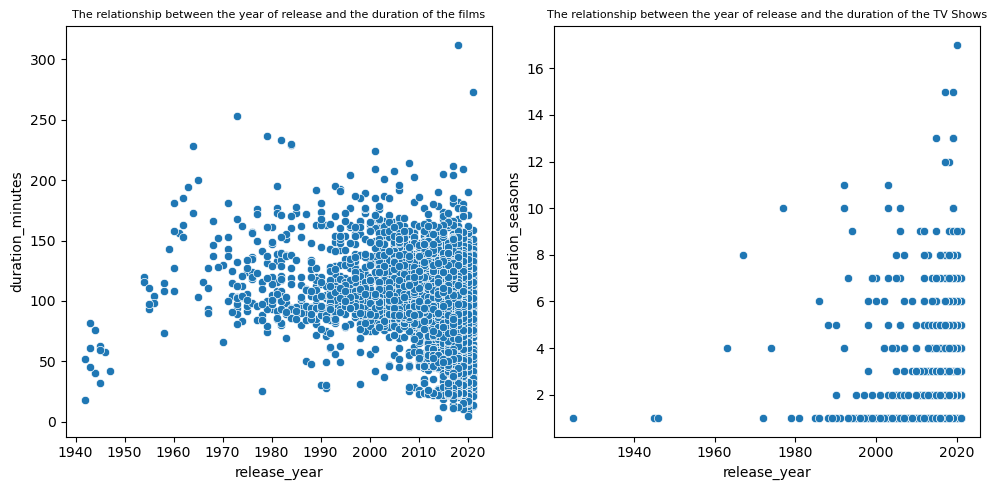

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.scatterplot(y = "duration_minutes", x = "release_year", data = df, ax = ax[0])
sns.scatterplot(y = "duration_seasons", x = "release_year", data = df, ax = ax[1])

ax[0].set_title('The relationship between the year of release and the duration of the films', fontsize=8)  # Title for first graph
ax[1].set_title('The relationship between the year of release and the duration of the TV Shows', fontsize=8)  # Title for second graph

plt.tight_layout()
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"release_year & type" column</b></p>

# Stacked bar chart showing the number of films and TV series added each year.

In [76]:
data = pd.DataFrame({
    'release_year': df.release_year,
    'type': df.type
})

data = data[data.release_year >= 2000]

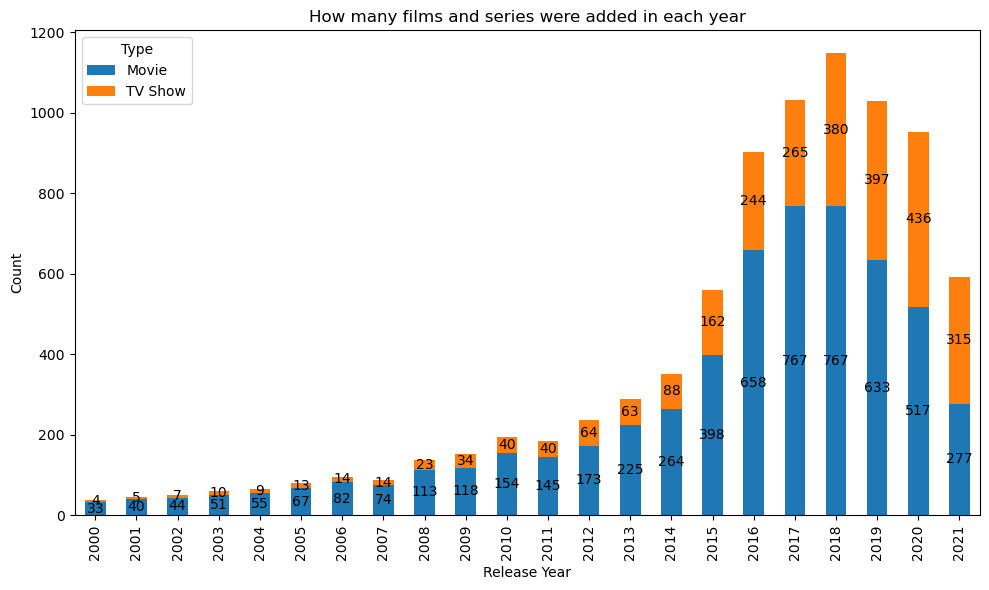

In [77]:
# Grouping the data by year and the 'type' column
grouped_data = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Creating a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding numbers on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # label_type='center' sayıları barların ortasına yerleştirir

# Graph title and labels
plt.title('How many films and series were added in each year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"cast" column</b></p>

# Word cloud showing the frequency of actor names

In [ ]:
# Combine all actor names from the 'cast' column
text = ' '.join(df[df.cast != "Unknown"].cast)
text

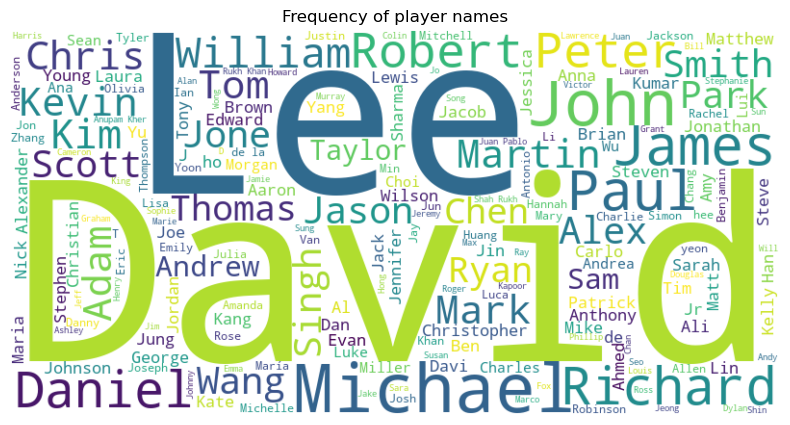

In [79]:
# Create WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Adjust the chart propertie
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequency of player names')
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"listed_in" column</b></p>

# Bar chart showing the number of contents in different categories

In [80]:
df.listed_in.value_counts().head(22)

listed_in
Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Ind

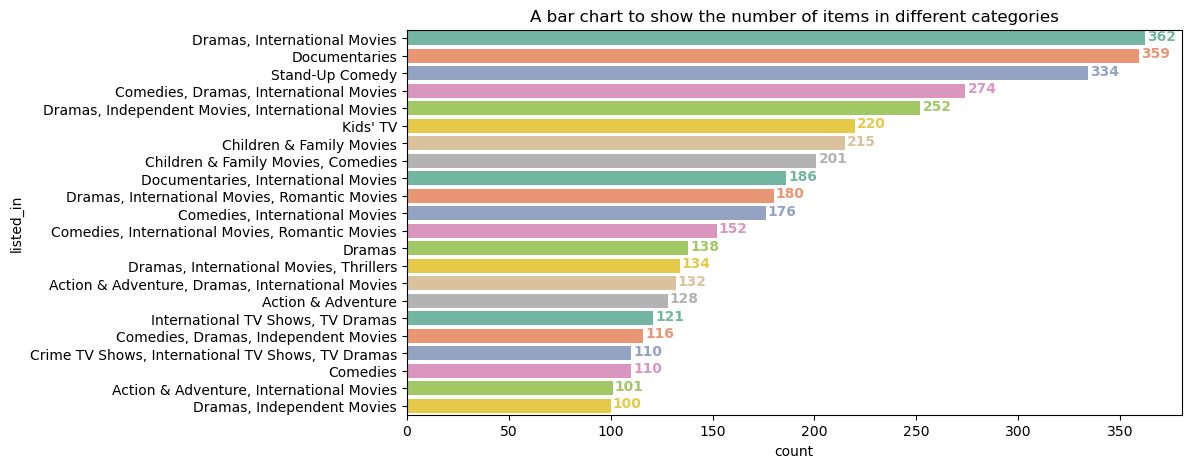

In [81]:
order = df.listed_in.value_counts().head(22).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, y = "listed_in", palette = "Set2", order = order)

plt.title('A bar chart to show the number of items in different categories')

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
    
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"director & listed_in" column</b></p>

# Creating a stacked bar chart to show which genres directors produced more content in

In [82]:
data = pd.DataFrame({
    'director': df.director,
    'listed_in': df.listed_in
})

data = data[(data.director != "Unknown") & (data.director.isin(data.director.value_counts().sort_values(ascending=False).head(11).index)) & (data.listed_in.isin(data.listed_in.value_counts().head(22).index))]
data

,director,listed_in
329,Steven Spielberg,Dramas
406,Rajiv Chilaka,Children & Family Movies
407,Rajiv Chilaka,Children & Family Movies
408,Rajiv Chilaka,Children & Family Movies
409,Rajiv Chilaka,Children & Family Movies
...,...,...
7308,Steven Spielberg,Dramas
7513,Suhas Kadav,"Children & Family Movies, Comedies"
8184,Steven Spielberg,Children & Family Movies
8696,Steven Spielberg,Dramas


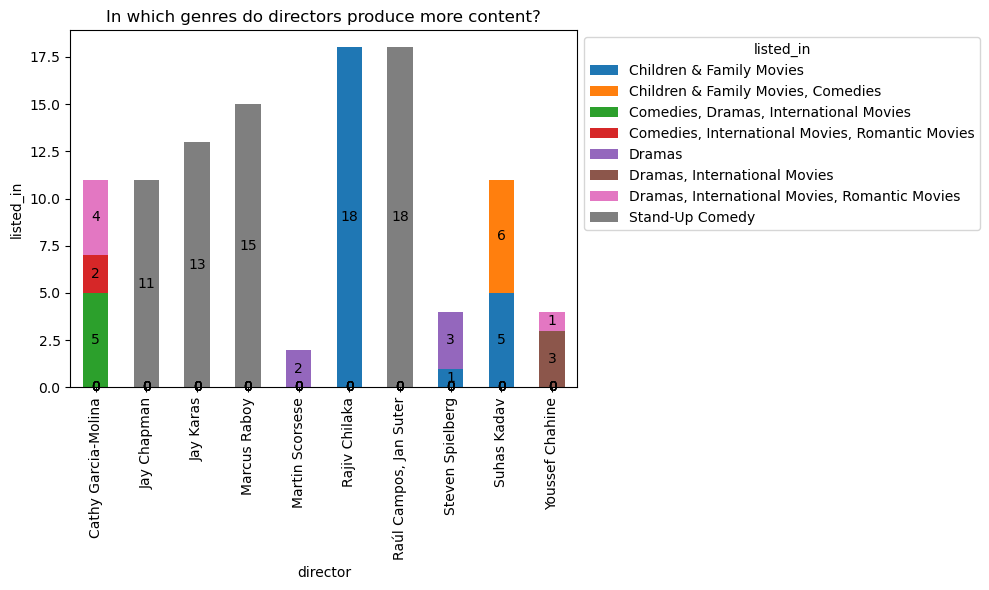

In [83]:
grouped_data = data.groupby(['director', 'listed_in']).size().unstack(fill_value=0)

# Create Stacked bar graph
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding numbers on the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)  # label_type='center' Place the numbers in the center of the bars

# Grafik title and labels
plt.title('In which genres do directors produce more content?')
plt.xlabel('director')
plt.ylabel('listed_in')
plt.legend(title='listed_in', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"description" column</b></p>

# Histogram visualization to get an idea of the lengths of the descriptions

In [84]:
len_data = pd.DataFrame({
    'description': df.description,
    'length': df.description.apply(lambda x: len(x))
})

len_data

,description,length
0,"As her father nears the end of his life, filmm...",152
1,"After crossing paths at a party, a Cape Town t...",147
2,To protect his family from a powerful drug lor...,146
3,"Feuds, flirtations and toilet talk go down amo...",147
4,In a city of coaching centers known to train I...,152
...,...,...
8802,"A political cartoonist, a crime reporter and a...",150
8803,"While living alone in a spooky town, a young g...",120
8804,Looking to survive in a world taken over by zo...,137
8805,"Dragged from civilian life, a former superhero...",149


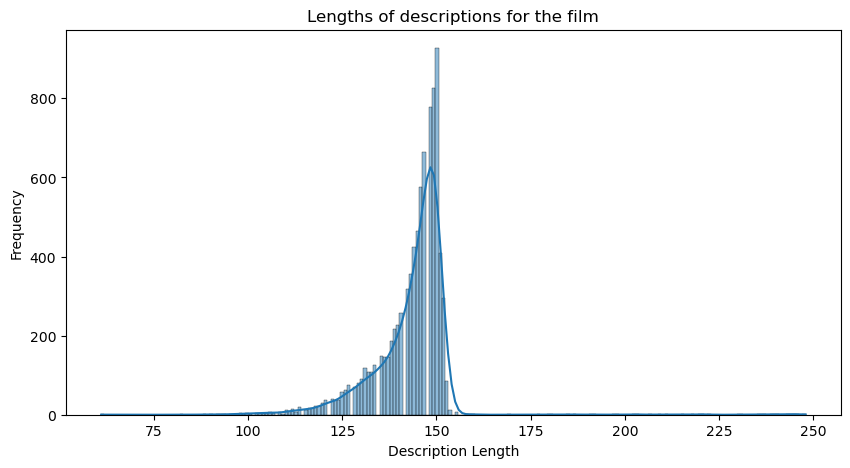

In [85]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.histplot(x = "length", data = len_data, kde = True)

plt.title("Lengths of descriptions for the film")
plt.xlabel("Description Length")
plt.ylabel("Frequency")

plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>HAVE A NICE DAY
</b></p>